In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_excel('YOUR DATA PATH')
print(df.head(5))
print(df.shape)
print(df.describe(),df.info())
print(df.isnull().sum()) #missing values


    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRatio  \
0  28395    610.291       208.178117       173.888747     1.197191   
1  28734    638.018       200.524796       182.734419     1.097356   
2  29380    624.110       212.826130       175.931143     1.209713   
3  30008    645.884       210.557999       182.516516     1.153638   
4  30140    620.134       201.847882       190.279279     1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  Roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.

In [11]:
set2_colors = sns.color_palette("Set2", 7)
set2_color_map = {
    "SEKER":    set2_colors[0], # cyan
    "BARBUNYA": set2_colors[1], # orange
    "BOMBAY":   set2_colors[2], # purple
    "CALI":     set2_colors[3], # pink
    "HOROZ":    set2_colors[4], # green
    "SIRA":     set2_colors[5], # yellow
    "DERMASON": set2_colors[6]  # grey
}

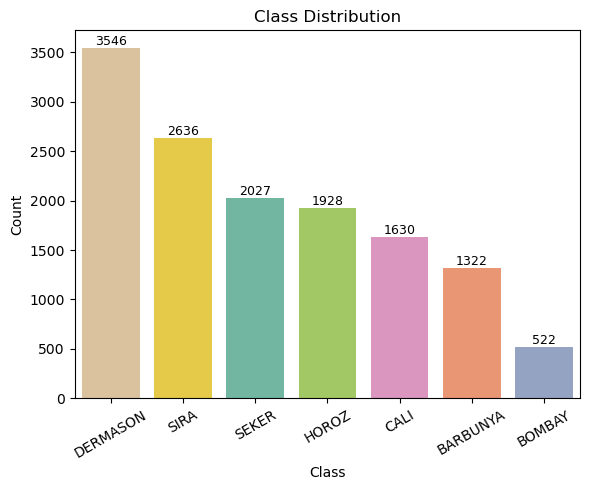

In [15]:
# 1. class distribution
plt.figure(figsize=(6, 5))

class_counts = df["Class"].value_counts()
order = class_counts.index

ax = sns.countplot(
    data=df,
    x="Class",
    order=order,
    palette=set2_color_map 
)

plt.xticks(rotation=30)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{int(height)}",
        (p.get_x() + p.get_width() / 2., height),
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()


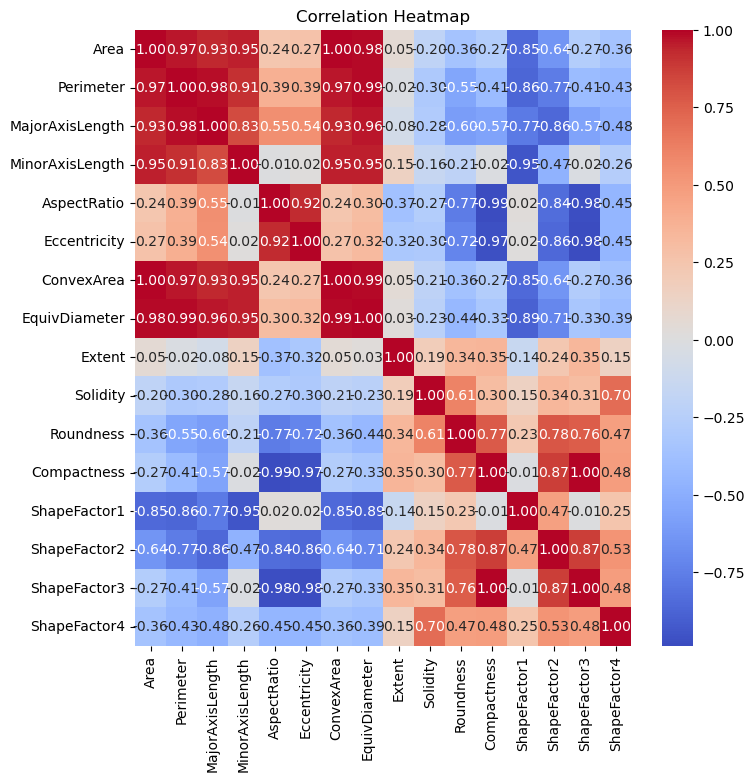

In [20]:
#2.correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

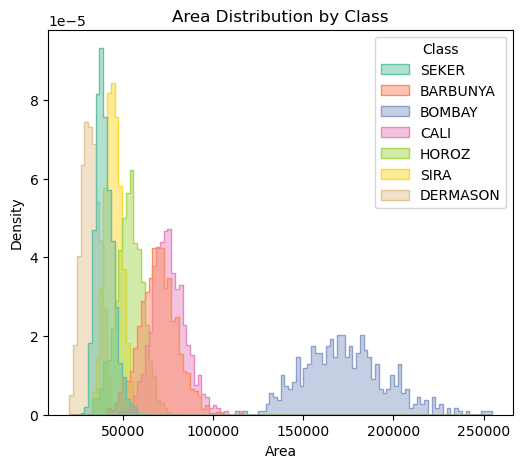

In [34]:
#3.Histogram
### change x
plt.figure(figsize=(6,5))
sns.histplot(
     data=df,
     x="Area",
     hue="Class",        
     element="step",   
     stat="density",     
     common_norm=False,  
     palette=set2_color_map,
     alpha=0.5 )
plt.title("Area Distribution by Class")
plt.show()


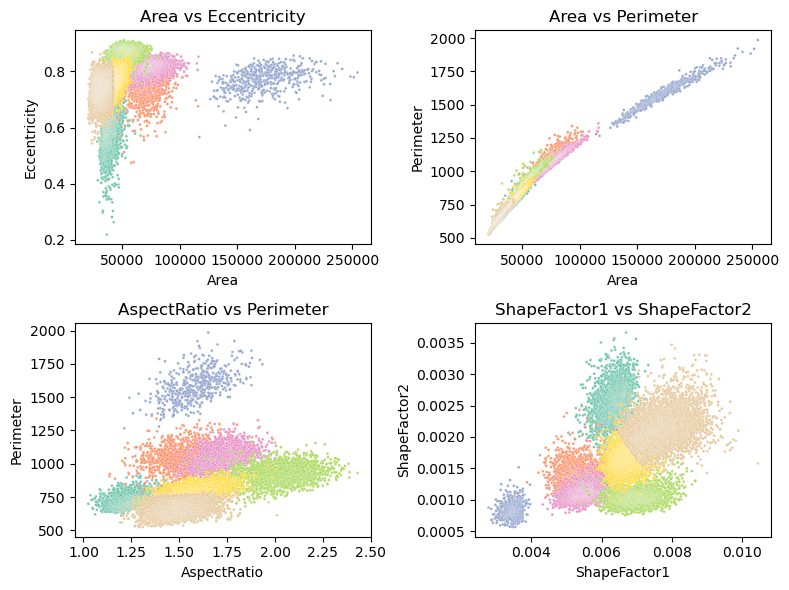

In [43]:
#4.Scatter
fig, axes=plt.subplots(2,2,figsize=(8,6))


plots = [
    ("Area", "Eccentricity", "Area vs Eccentricity"),
    ("Area", "Perimeter", "Area vs Perimeter"),
    ("AspectRatio", "Perimeter", "AspectRatio vs Perimeter"),
    ("ShapeFactor1", "ShapeFactor2", "ShapeFactor1 vs ShapeFactor2"),
]

for ax, (x, y, title) in zip(axes.flat, plots):
    sns.scatterplot(
        data=df,
        x=x,
        y=y,
        hue="Class",
        palette=set2_color_map,
        s=4,
        alpha=0.9,
        legend=False,
        ax=ax
    )
    ax.set_title(title)

plt.tight_layout()
plt.show()

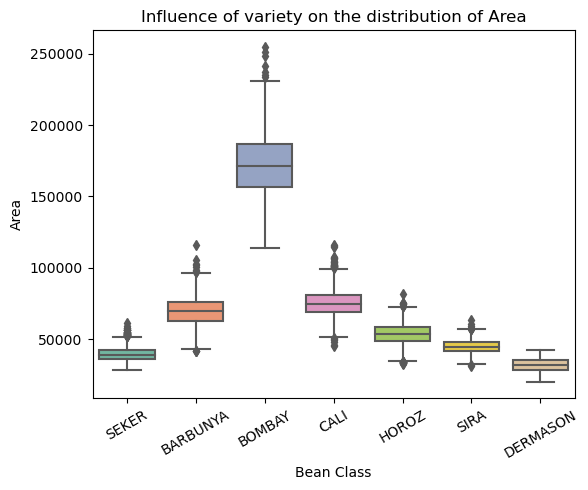

In [47]:
#5.Boxplot
##change y
plt.figure(figsize=(6,5))
sns.boxplot(
    data=df,
    x="Class",
    y="Area",     
    palette=set2_color_map
)
plt.title("Influence of variety on the distribution of Area")
plt.xlabel("Bean Class")
plt.ylabel("Area")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()